# Pick a few targets and plot them

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)
from pathlib import Path
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15
plt.rcParams['figure.figsize'] = (6, 4)
# path to the data
data_dir = Path('../../../../../data/')
dataset_dir = data_dir / 'out' / 'dataset'
subset_name = 'target_subset_' + Path('.').resolve().parent.name
score_dir = dataset_dir / 'score' / 'subsets' / subset_name
assert score_dir.exists()
fig_dir = score_dir / 'fig' / 'MQA'
fig_dir.mkdir(parents=True, exist_ok=True)
target_list = data_dir / 'interim' / f'{subset_name}.csv'
assert target_list.exists()
# load all score
df = pd.read_csv(score_dir / 'all_score.csv.gz', index_col=0)
result_each_target = pd.read_csv(score_dir / 'mqa_result_each_target_gdtts_5.csv', index_col=0)
result_each_target_ptm = pd.read_csv(score_dir / 'mqa_result_each_target_gdtts_5_with_ptm.csv', index_col=0)
display(df)

Model  TMscore  GDT_TS  GDT_HA  Global_LDDT  \
0       model_1_ptm_seed_0_rec_10_ens_1    0.981   0.980   0.919        0.910   
1       model_1_ptm_seed_0_rec_10_ens_8    0.981   0.979   0.916        0.910   
2        model_1_ptm_seed_0_rec_1_ens_1    0.981   0.980   0.917        0.909   
3        model_1_ptm_seed_0_rec_1_ens_8    0.980   0.979   0.917        0.910   
4        model_1_ptm_seed_0_rec_2_ens_1    0.981   0.979   0.919        0.911   
...                                 ...      ...     ...     ...          ...   
108595       model_5_seed_1_rec_7_ens_8    0.960   0.981   0.887        0.909   
108596       model_5_seed_1_rec_8_ens_1    0.960   0.981   0.887        0.910   
108597       model_5_seed_1_rec_8_ens_8    0.960   0.981   0.884        0.909   
108598       model_5_seed_1_rec_9_ens_1    0.959   0.981   0.887        0.908   
108599       model_5_seed_1_rec_9_ens_8    0.961   0.981   0.884        0.909   

        Mean_LDDT  pLDDT  pTMscore  Tolerance    ModelName  ...       SOAP  \
0           0.901  0.955     0.900      0.032  model_1_ptm  ... 123028.594   
1           0.901  0.956     0.901      0.019  model_1_ptm  ... 123495.156   
2           0.901  0.944     0.895     20.749  model_1_ptm  ... 120974.703   
3           0.901  0.947     0.896     20.749  model_1_ptm  ... 120961.469   
4           0.903  0.948     0.897      0.172  model_1_ptm  ... 121001.195   
...           ...    ...       ...        ...          ...  ...        ...   
108595      0.907  0.875       NaN      0.627      model_5  ...  53667.109   
108596      0.907  0.876       NaN      0.339      model_5  ...  52914.828   
108597      0.907  0.875       NaN      0.426      model_5  ...  53587.473   
108598      0.906  0.876       NaN      0.492      model_5  ...  52835.391   
108599      0.906  0.875       NaN      0.148      model_5  ...  53197.340   

        DeepAccNet  DeepAccNet-Bert P3CMQA  ProQ2D  ProQRosCenD  ProQRosFAD  \
0            0.994            0.891  0.973   0.821        0.806       0.967   
1            0.995            0.955  0.972   0.823        0.805       0.966   
2            0.990            0.894  0.977   0.822        0.803       0.961   
3            0.993            0.878  0.977   0.828        0.805       0.966   
4            0.989            0.866  0.973   0.816        0.793       0.963   
...            ...              ...    ...     ...          ...         ...   
108595       0.854            0.792  0.674   0.584        0.654       0.871   
108596       0.835            0.792  0.653   0.556        0.633       0.853   
108597       0.843            0.787  0.650   0.554        0.621       0.862   
108598       0.844            0.791  0.654   0.589        0.665       0.871   
108599       0.837            0.776  0.667   0.579        0.654       0.870   

       ProQ3D  SBROD VoroCNN  
0       0.895  1.505   0.686  
1       0.894  1.507   0.687  
2       0.891  1.515   0.687  
3       0.892  1.514   0.684  
4       0.888  1.513   0.679  
...       ...    ...     ...  
108595  0.730  1.481   0.633  
108596  0.707  1.481   0.629  
108597  0.723  1.478   0.631  
108598  0.721  1.477   0.631  
108599  0.723  1.492   0.635  

[108600 rows x 37 columns]

## Targets with low relationships between GDT_TS and pLDDT

### GDT_TS loss

In [2]:
method = 'pLDDT'
label = 'GDT_TS'
metric = 'Loss'
label_metric = f'{label} {metric}'
low_gdtts_loss_df = result_each_target.query('Method == @method')[['Target', label_metric]].sort_values(label_metric)
low_gdtts_loss_df

Target  GDT_TS Loss
648  6P58_A        0.000
388  6I1M_A        0.000
938  6XM2_I        0.000
288  6GTZ_A        0.000
478  6JU8_A        0.000
..      ...          ...
698  6RO0_B       12.310
908  6WVH_A       12.630
268  6G45_A       13.670
138  6DCR_A       14.120
58   5Y24_A       17.630

[121 rows x 2 columns]

In [3]:
target_num = 10
display(low_gdtts_loss_df.tail(target_num).reset_index(drop=True))
sample_targets = low_gdtts_loss_df[-target_num:]['Target'].to_list()

Target  GDT_TS Loss
0  6NES_A        9.800
1  6H3S_B       11.090
2  6I6H_A       11.590
3  7N50_A       11.820
4  6SP9_A       11.930
5  6RO0_B       12.310
6  6WVH_A       12.630
7  6G45_A       13.670
8  6DCR_A       14.120
9  5Y24_A       17.630

Target                           Model GDT_TS pLDDT    legend
0  5Y24_A     model_5_seed_1_rec_10_ens_1  0.977 0.941      best
1  5Y24_A  model_3_ptm_seed_0_rec_2_ens_1  0.801 0.944  selected

Target                           Model GDT_TS pLDDT    legend
0  6DCR_A  model_5_ptm_seed_1_rec_4_ens_1  0.883 0.872      best
1  6DCR_A      model_2_seed_0_rec_5_ens_1  0.741 0.892  selected

Target                            Model GDT_TS pLDDT    legend
0  6G45_A  model_4_ptm_seed_1_rec_10_ens_1  0.704 0.617      best
1  6G45_A  model_2_ptm_seed_1_rec_10_ens_1  0.568 0.638  selected

Target                           Model GDT_TS pLDDT    legend
0  6H3S_B  model_4_ptm_seed_0_rec_6_ens_1  0.652 0.858      best
1  6H3S_B  model_5_ptm_seed_1_rec_9_ens_1  0.541 0.895  selected

Target                        Model GDT_TS pLDDT    legend
0  6I6H_A  model_5_seed_1_rec_10_ens_1  0.988 0.916      best
1  6I6H_A  model_2_seed_0_rec_10_ens_1  0.872 0.941  selected

Target                            Model GDT_TS pLDDT    legend
0  6NES_A  model_2_ptm_seed_0_rec_10_ens_1  0.957 0.925      best
1  6NES_A   model_4_ptm_seed_0_rec_4_ens_1  0.859 0.937  selected

Target                           Model GDT_TS pLDDT    legend
0  6RO0_B  model_5_ptm_seed_0_rec_5_ens_1  0.712 0.741      best
1  6RO0_B  model_3_ptm_seed_1_rec_6_ens_1  0.589 0.787  selected

Target                           Model GDT_TS pLDDT    legend
0  6SP9_A  model_3_ptm_seed_1_rec_3_ens_8  0.914 0.888      best
1  6SP9_A      model_1_seed_1_rec_1_ens_1  0.794 0.905  selected

Target                        Model GDT_TS pLDDT    legend
0  6WVH_A   model_4_seed_1_rec_1_ens_1  0.799 0.907      best
1  6WVH_A  model_3_seed_0_rec_10_ens_1  0.673 0.929  selected

Target                           Model GDT_TS pLDDT    legend
0  7N50_A  model_1_ptm_seed_1_rec_6_ens_8  0.712 0.746      best
1  7N50_A  model_2_ptm_seed_0_rec_4_ens_8  0.594 0.774  selected

Model  TMscore  GDT_TS  GDT_HA  Global_LDDT  \
800     model_1_ptm_seed_0_rec_10_ens_1    0.860   0.742   0.596        0.810   
801      model_1_ptm_seed_0_rec_1_ens_1    0.857   0.734   0.576        0.807   
802      model_1_ptm_seed_0_rec_2_ens_1    0.859   0.737   0.585        0.808   
803      model_1_ptm_seed_0_rec_3_ens_1    0.857   0.741   0.591        0.810   
804      model_1_ptm_seed_0_rec_4_ens_1    0.859   0.740   0.590        0.809   
...                                 ...      ...     ...     ...          ...   
102795       model_5_seed_1_rec_7_ens_8    0.985   0.969   0.822          NaN   
102796       model_5_seed_1_rec_8_ens_1    0.986   0.975   0.834          NaN   
102797       model_5_seed_1_rec_8_ens_8    0.985   0.971   0.827          NaN   
102798       model_5_seed_1_rec_9_ens_1    0.986   0.977   0.839          NaN   
102799       model_5_seed_1_rec_9_ens_8    0.986   0.973   0.833          NaN   

        Mean_LDDT  pLDDT  pTMscore  Tolerance    ModelName  ...  \
800         0.805  0.852     0.838      0.433  model_1_ptm  ...   
801         0.801  0.840     0.831     41.000  model_1_ptm  ...   
802         0.803  0.841     0.828      0.829  model_1_ptm  ...   
803         0.806  0.844     0.832      0.977  model_1_ptm  ...   
804         0.804  0.845     0.830      0.629  model_1_ptm  ...   
...           ...    ...       ...        ...          ...  ...   
102795        NaN  0.941       NaN      0.136      model_5  ...   
102796        NaN  0.941       NaN      0.051      model_5  ...   
102797        NaN  0.941       NaN      0.108      model_5  ...   
102798        NaN  0.941       NaN      0.085      model_5  ...   
102799        NaN  0.942       NaN      0.090      model_5  ...   

        DeepAccNet-Bert  P3CMQA  ProQ2D ProQRosCenD  ProQRosFAD  ProQ3D  \
800               0.999   0.876   0.685       0.645       0.908   0.782   
801               0.998   0.873   0.686       0.651       0.911   0.788   
802               0.999   0.878   0.697       0.651       0.911   0.793   
803               0.998   0.875   0.700       0.661       0.914   0.791   
804               0.998   0.875   0.682       0.647       0.907   0.785   
...                 ...     ...     ...         ...         ...     ...   
102795            0.999   0.934   0.705       0.567       0.842   0.690   
102796            0.997   0.933   0.671       0.487       0.807   0.662   
102797            0.998   0.933   0.703       0.577       0.843   0.689   
102798            0.998   0.935   0.680       0.514       0.820   0.671   
102799            0.995   0.931   0.688       0.508       0.819   0.671   

        SBROD VoroCNN    Loss size  
800     2.127   0.692  others    5  
801     2.133   0.692  others    5  
802     2.126   0.693  others    5  
803     2.119   0.692  others    5  
804     2.125   0.692  others    5  
...       ...     ...     ...  ...  
102795  1.589   0.670  others    5  
102796  1.587   0.668  others    5  
102797  1.589   0.668  others    5  
102798  1.584   0.669  others    5  
102799  1.588   0.669  others    5  

[3200 rows x 39 columns]

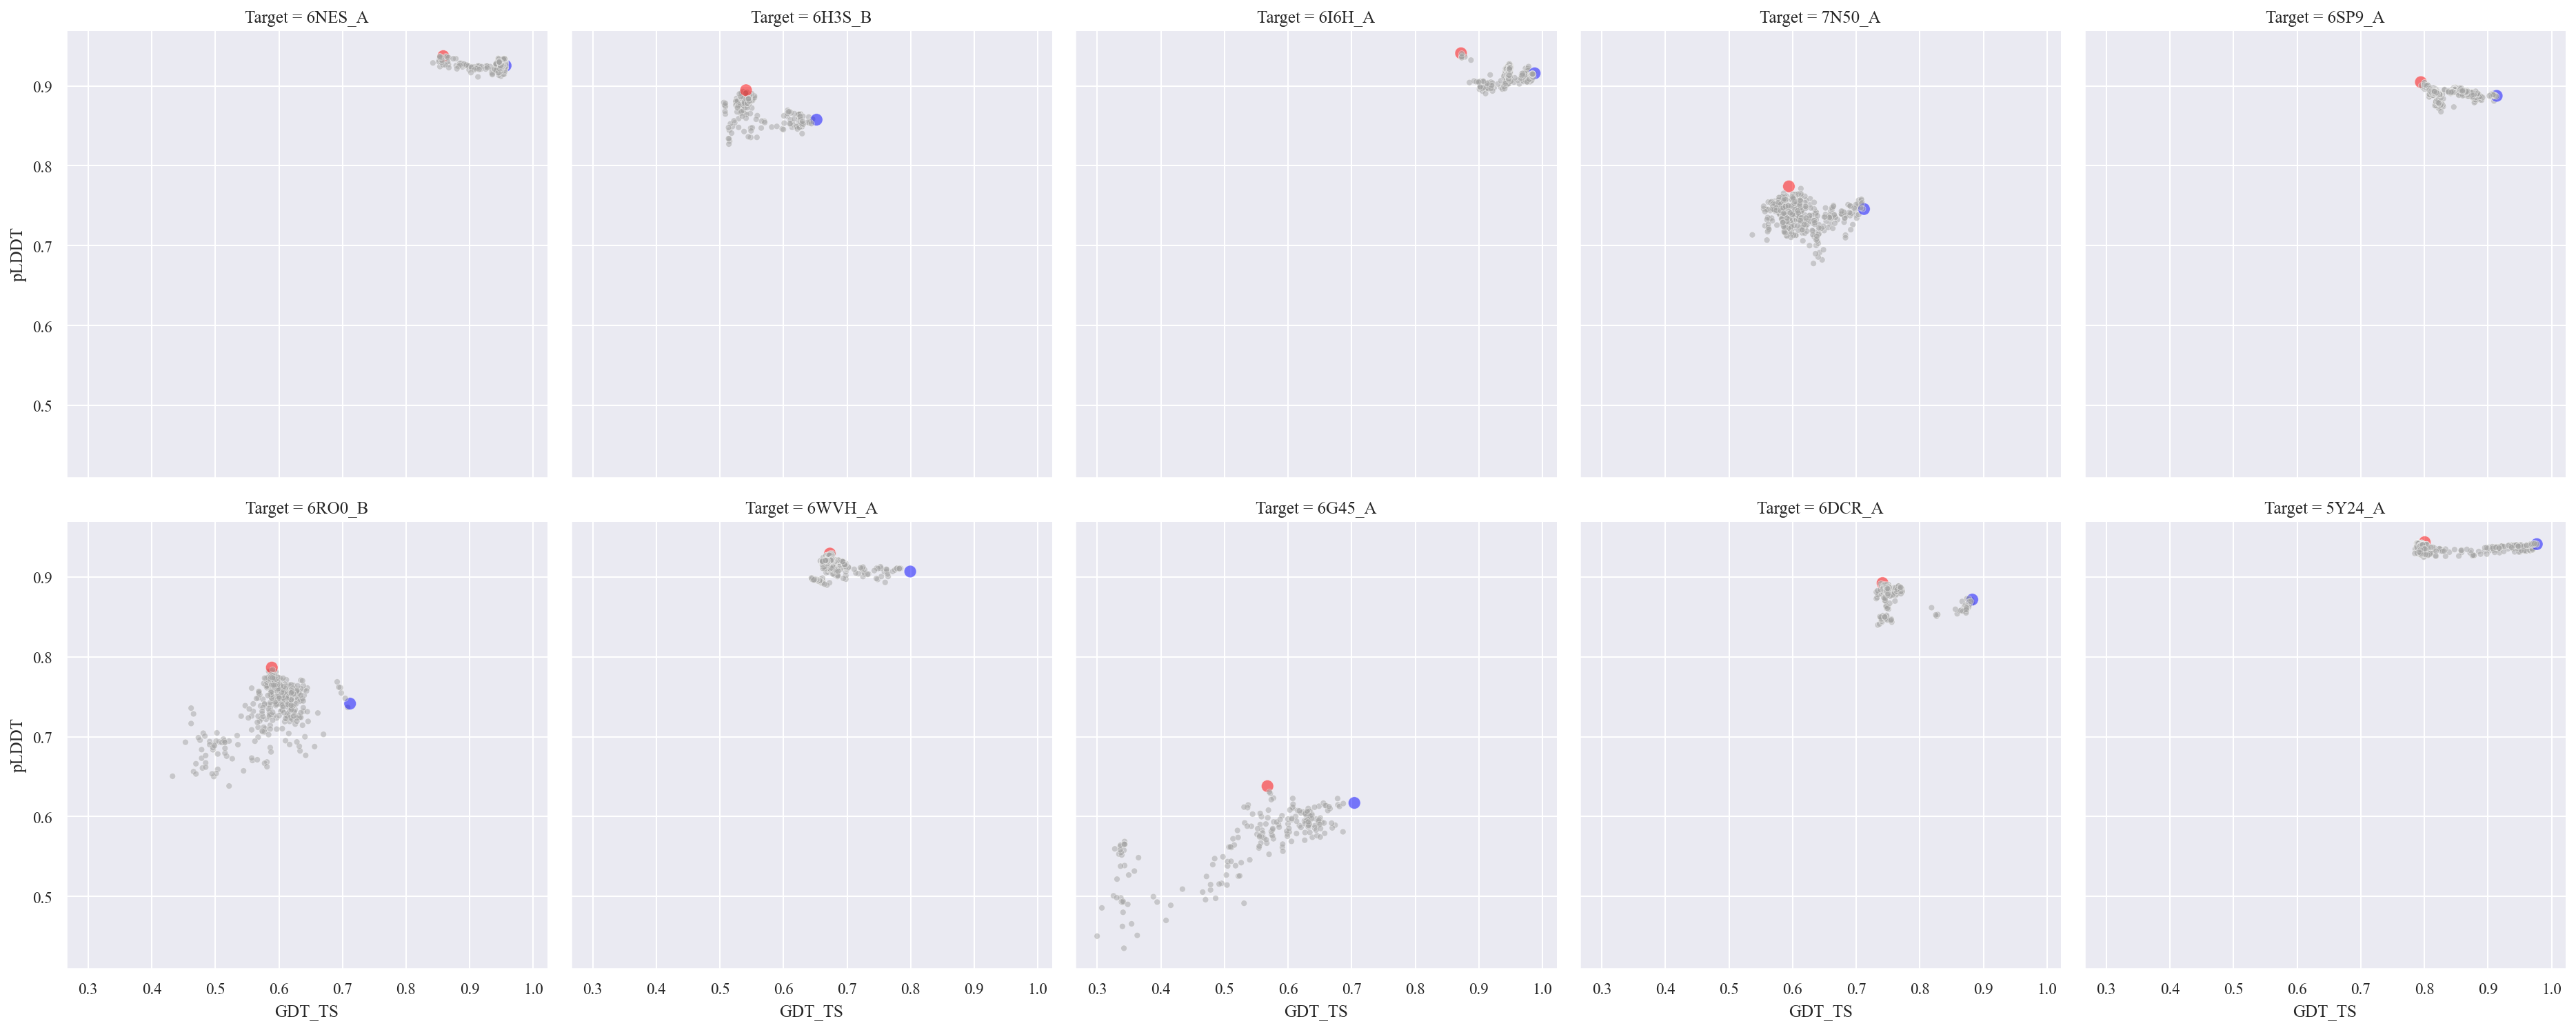

In [4]:
data = df.groupby('Target').filter(lambda x: x.name in sample_targets)
def add_legend(group, label, method, legend='Loss'):
    best_idx = group[label].idxmax()
    selected_idx = group[method].idxmax()
    best_row = group.loc[best_idx]
    selected_row = group.loc[selected_idx]
    columns = ['Target', 'Model', label, method, 'legend']
    best_row['legend'] = 'best'
    selected_row['legend'] = 'selected'
    display(pd.concat([best_row[columns].to_frame().T, selected_row[columns].to_frame().T]).reset_index(drop=True))
    group[legend] = 'others'
    group[legend][best_idx] = 'best'
    group[legend][selected_idx] = 'selected'
    size = 5
    group['size'] = size
    size_focus = size * 5
    group['size'][best_idx] = size_focus
    group['size'][selected_idx] = size_focus
    return group

label = 'GDT_TS'
method = 'pLDDT'
data = data.groupby('Target').apply(add_legend, label=label, method=method)
display(data)
x, y = label, method
g = sns.relplot(data=data, x=x, y=y, kind='scatter', hue='Loss', size='size',
            col='Target', col_wrap=5, col_order=sample_targets,
            palette=['#a3a3a3', 'red', 'blue'], alpha=0.5)
g.legend.remove()

In [5]:
# Target which is the worst loss
sample_target = sample_targets[-1]
data = df.groupby('Target').filter(lambda x: x.name in sample_target)
label = 'GDT_TS'
method = 'pLDDT'
data = data.groupby('Target').apply(add_legend, label=label, method=method)
# display(data)
x, y = label, method
g = sns.relplot(data=data, x=x, y=y, kind='scatter', hue='Loss', size='size',
            col='Target', col_wrap=5, palette=['#a3a3a3', 'red', 'blue'], alpha=0.5)
plt.xlim(0, 1)
plt.ylim(0, 1)
g.legend.remove()

Target                           Model GDT_TS pLDDT    legend
0  5Y24_A     model_5_seed_1_rec_10_ens_1  0.977 0.941      best
1  5Y24_A  model_3_ptm_seed_0_rec_2_ens_1  0.801 0.944  selected

In [6]:
# Target which is the 2nd worst loss
sample_target = sample_targets[-2]
data = df.groupby('Target').filter(lambda x: x.name in sample_target)
label = 'GDT_TS'
method = 'pLDDT'
data = data.groupby('Target').apply(add_legend, label=label, method=method)
# display(data)
x, y = label, method
g = sns.relplot(data=data, x=x, y=y, kind='scatter', hue='Loss', size='size',
            col='Target', col_wrap=5, palette=['#a3a3a3', 'red', 'blue'], alpha=0.5)
plt.xlim(0, 1)
plt.ylim(0, 1)
g.legend.remove()

Target                           Model GDT_TS pLDDT    legend
0  6DCR_A  model_5_ptm_seed_1_rec_4_ens_1  0.883 0.872      best
1  6DCR_A      model_2_seed_0_rec_5_ens_1  0.741 0.892  selected

### Pearson

In [7]:
# Pearson
method = 'pLDDT'
label = 'GDT_TS'
metric = 'Pearson'
label_metric = f'{label} {metric}'
low_corr_df = result_each_target.query('Method == @method')[['Target', label_metric]].sort_values(label_metric)
low_corr_df

Target  GDT_TS Pearson
1088  7COH_O          -0.630
108   6CZQ_B          -0.594
328   6H3S_B          -0.467
88    5ZOE_A          -0.459
1158  7KIH_A          -0.444
...      ...             ...
608   6NW2_A           0.853
338   6H7B_A           0.871
318   6H24_A           0.915
198   6EXU_A           0.930
38    5VTL_A           0.981

[121 rows x 2 columns]

In [8]:
target_num = 10
display(low_corr_df.head(target_num).reset_index(drop=True))
sample_targets = low_corr_df.head(target_num)['Target'].to_list()
sample_targets

Target  GDT_TS Pearson
0  7COH_O          -0.630
1  6CZQ_B          -0.594
2  6H3S_B          -0.467
3  5ZOE_A          -0.459
4  7KIH_A          -0.444
5  6FAK_A          -0.436
6  6NLY_B          -0.427
7  7CLU_A          -0.407
8  7LCZ_A          -0.335
9  6NJ0_A          -0.331

['7COH_O',
 '6CZQ_B',
 '6H3S_B',
 '5ZOE_A',
 '7KIH_A',
 '6FAK_A',
 '6NLY_B',
 '7CLU_A',
 '7LCZ_A',
 '6NJ0_A']

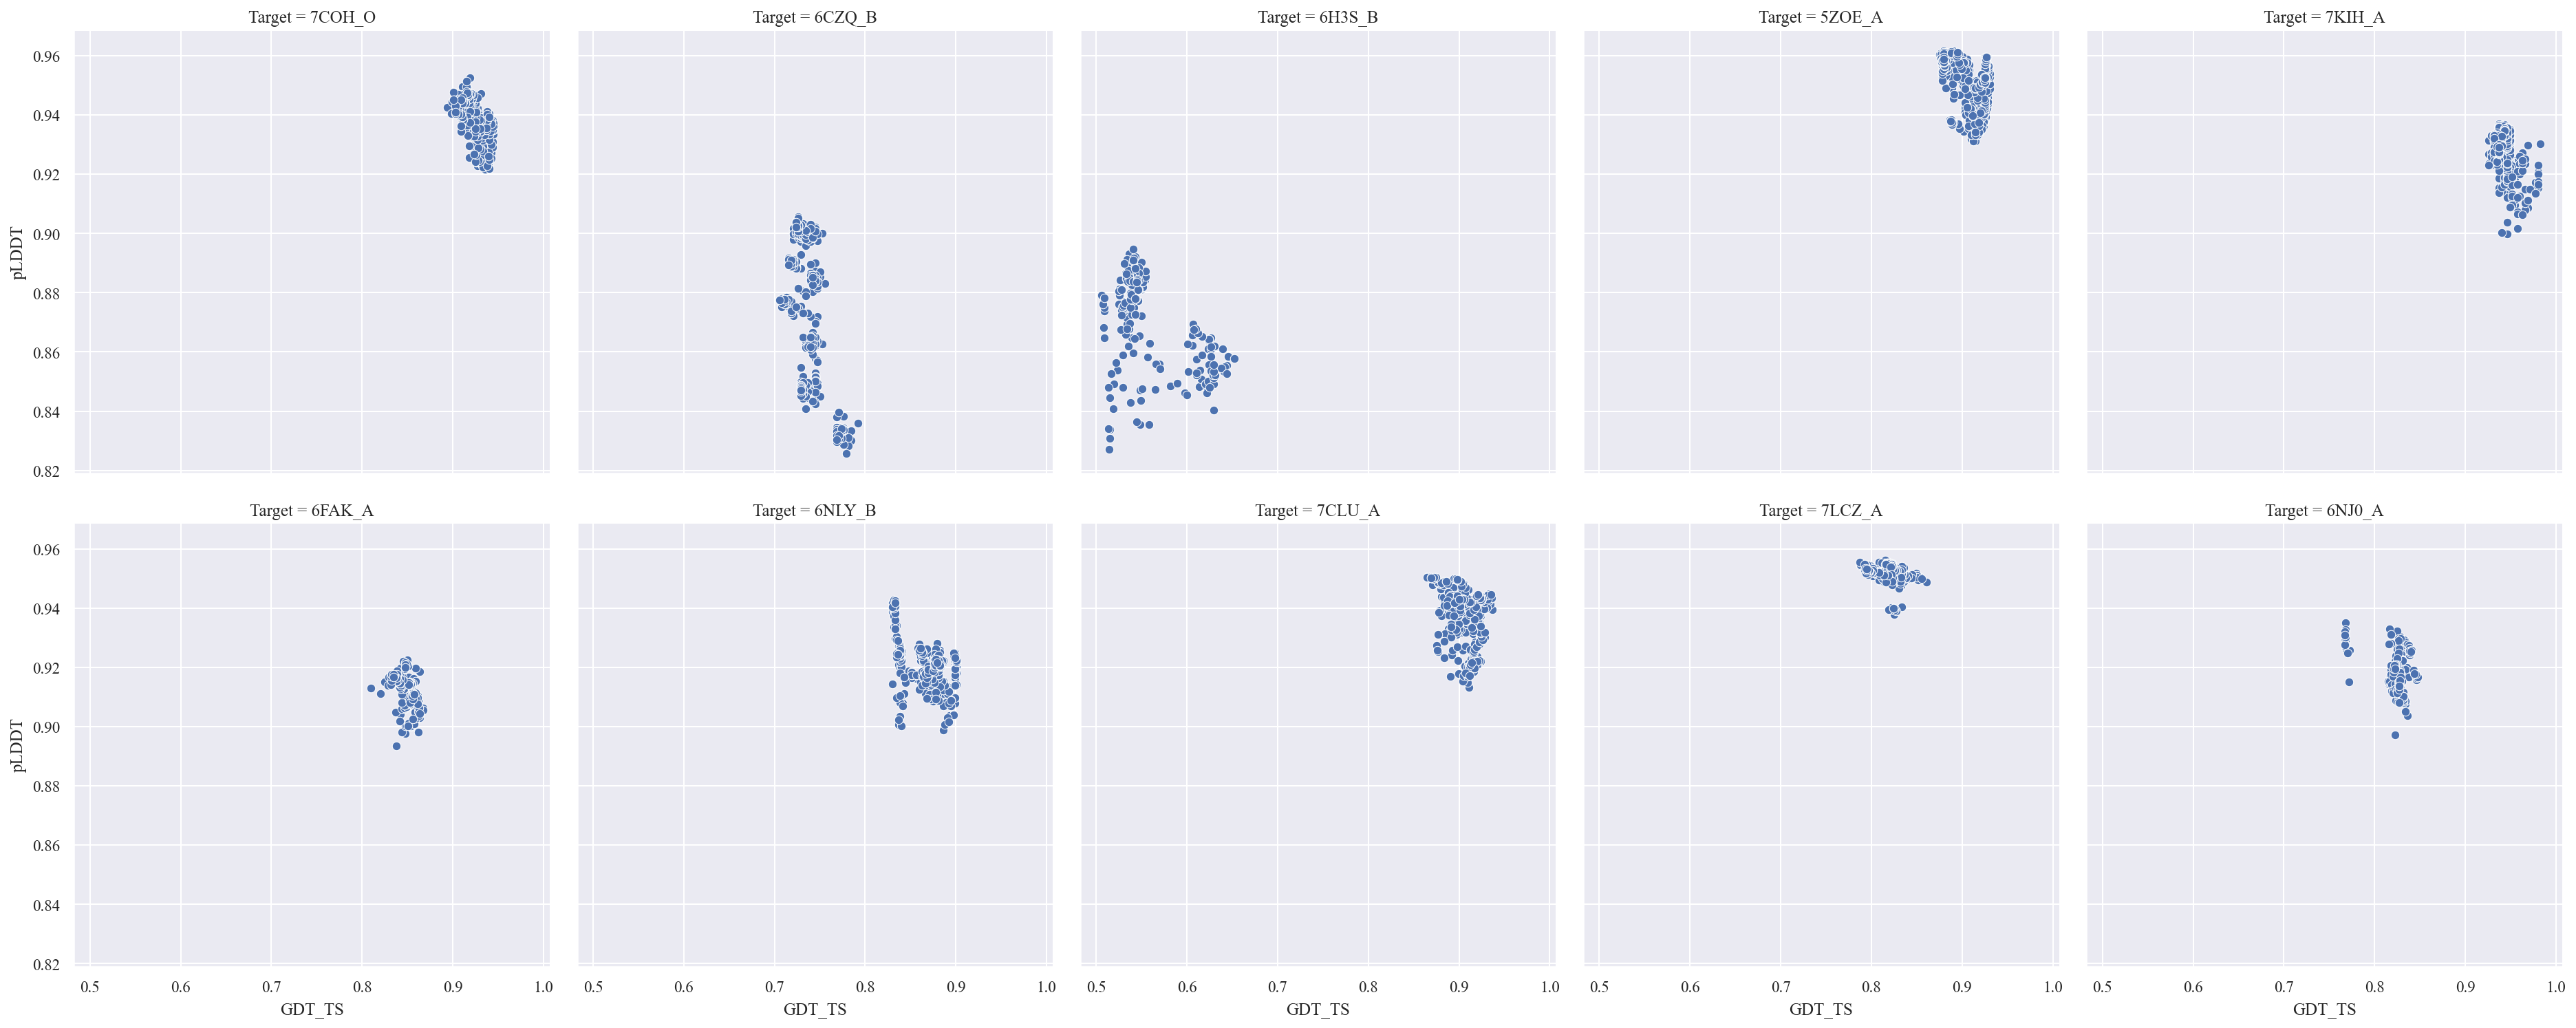

In [9]:
data = df.groupby('Target').filter(lambda x: x.name in sample_targets)
method = 'pLDDT'
label = 'GDT_TS'
x, y = label, method
sns.relplot(data=data, x=x, y=y, kind='scatter', col='Target', col_wrap=5, col_order=sample_targets)

## Target with low relationship between GDT_TS and pTMscore

### Target with Low GDT_TS loss

In [10]:
method = 'pTMscore'
label = 'GDT_TS'
metric = 'Loss'
label_metric = f'{label} {metric}'
low_gdtts_loss_df_ptm = result_each_target_ptm.query('Method == @method')[['Target', label_metric]].sort_values(label_metric)
low_gdtts_loss_df_ptm

Target  GDT_TS Loss
539   6P58_A        0.000
699   6TJB_B        0.000
729   6UPS_A        0.000
679   6T85_A        0.000
439   6LIR_A        0.000
...      ...          ...
799   6WVH_A       11.580
1079  7N50_A       11.820
589   6RO0_B       12.310
199   6G45_A       13.670
49    5Y24_A       17.040

[108 rows x 2 columns]

In [11]:
target_num = 2
display(low_gdtts_loss_df_ptm.tail(target_num).reset_index(drop=True))
sample_targets = low_gdtts_loss_df_ptm[-target_num:]['Target'].to_list()

Target  GDT_TS Loss
0  6G45_A       13.670
1  5Y24_A       17.040

Target                            Model GDT_TS pTMscore    legend
0  5Y24_A  model_4_ptm_seed_1_rec_10_ens_8  0.971    0.895      best
1  5Y24_A   model_3_ptm_seed_0_rec_2_ens_1  0.801    0.905  selected

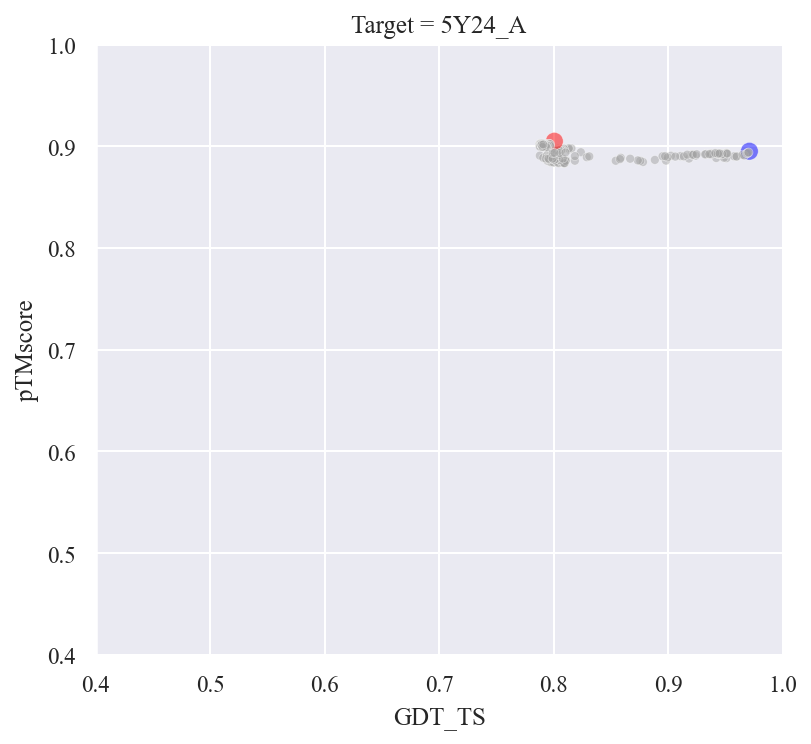

In [12]:
# Target which is the worst loss
label = 'GDT_TS'
method = 'pTMscore'
sample_target = sample_targets[-1]
data = df[~df[method].isna()].groupby('Target').filter(lambda x: x.name in sample_target)
data = data.groupby('Target').apply(add_legend, label=label, method=method)
# display(data)
x, y = label, method
g = sns.relplot(data=data, x=x, y=y, kind='scatter', hue='Loss', size='size',
            col='Target', col_wrap=5, palette=['#a3a3a3', 'red', 'blue'], alpha=0.5)
plt.xlim(0.4, 1)
plt.ylim(0.4, 1)
g.legend.remove()

Target                            Model GDT_TS pTMscore    legend
0  6G45_A  model_4_ptm_seed_1_rec_10_ens_1  0.704    0.621      best
1  6G45_A  model_2_ptm_seed_1_rec_10_ens_1  0.568    0.656  selected

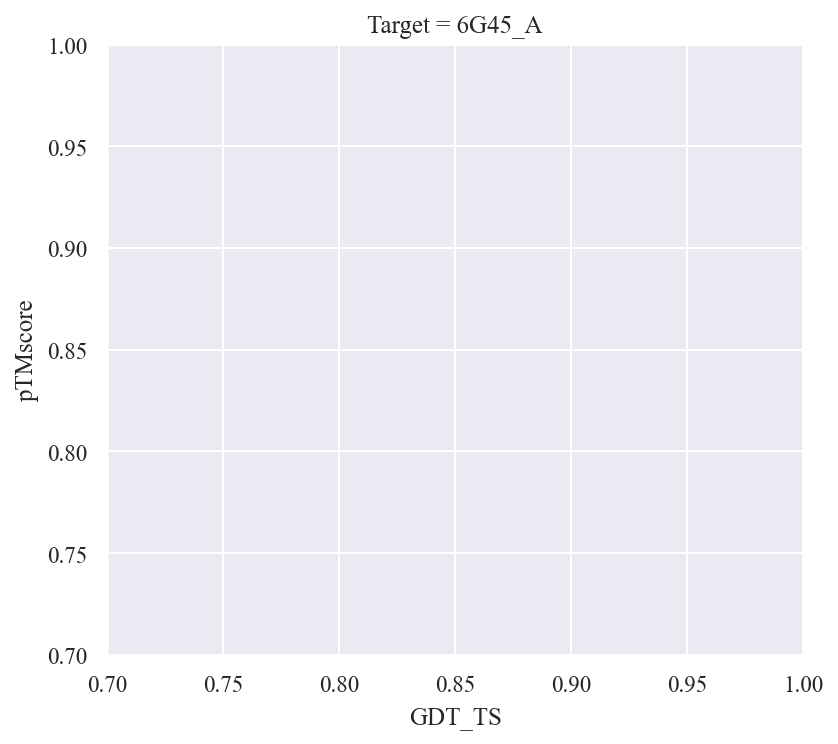

In [13]:
# Target which is the worst loss
label = 'GDT_TS'
method = 'pTMscore'
sample_target = sample_targets[-2]
data = df[~df[method].isna()].groupby('Target').filter(lambda x: x.name in sample_target)
data = data.groupby('Target').apply(add_legend, label=label, method=method)
# display(data)
x, y = label, method
g = sns.relplot(data=data, x=x, y=y, kind='scatter', hue='Loss', size='size',
            col='Target', col_wrap=5, palette=['#a3a3a3', 'red', 'blue'], alpha=0.5)
plt.xlim(0.7, 1)
plt.ylim(0.7, 1)
g.legend.remove()

### Targets with low correlation between pTMscore and GDT_TS

In [14]:
# Pearson
method = 'pTMscore'
label = 'GDT_TS'
metric = 'Pearson'
label_metric = f'{label} {metric}'
low_corr_df_ptm = result_each_target_ptm.query('Method == @method')[['Target', label_metric]].sort_values(label_metric)
low_corr_df_ptm

Target  GDT_TS Pearson
89   6CZQ_B          -0.814
69   5ZOE_A          -0.669
969  7COH_O          -0.636
139  6E2J_A          -0.621
779  6W40_A          -0.592
..      ...             ...
199  6G45_A           0.917
39   5XP0_A           0.938
249  6H24_A           0.942
149  6EXU_A           0.964
29   5VTL_A           0.977

[108 rows x 2 columns]

In [15]:
target_num = 10
display(low_corr_df_ptm.head(target_num).reset_index(drop=True))
sample_targets = low_corr_df_ptm.head(target_num)['Target'].to_list()
sample_targets

Target  GDT_TS Pearson
0  6CZQ_B          -0.814
1  5ZOE_A          -0.669
2  7COH_O          -0.636
3  6E2J_A          -0.621
4  6W40_A          -0.592
5  6G2V_A          -0.567
6  6NES_A          -0.504
7  6NJ0_A          -0.443
8  7KIH_A          -0.421
9  6NLY_B          -0.371

['6CZQ_B',
 '5ZOE_A',
 '7COH_O',
 '6E2J_A',
 '6W40_A',
 '6G2V_A',
 '6NES_A',
 '6NJ0_A',
 '7KIH_A',
 '6NLY_B']

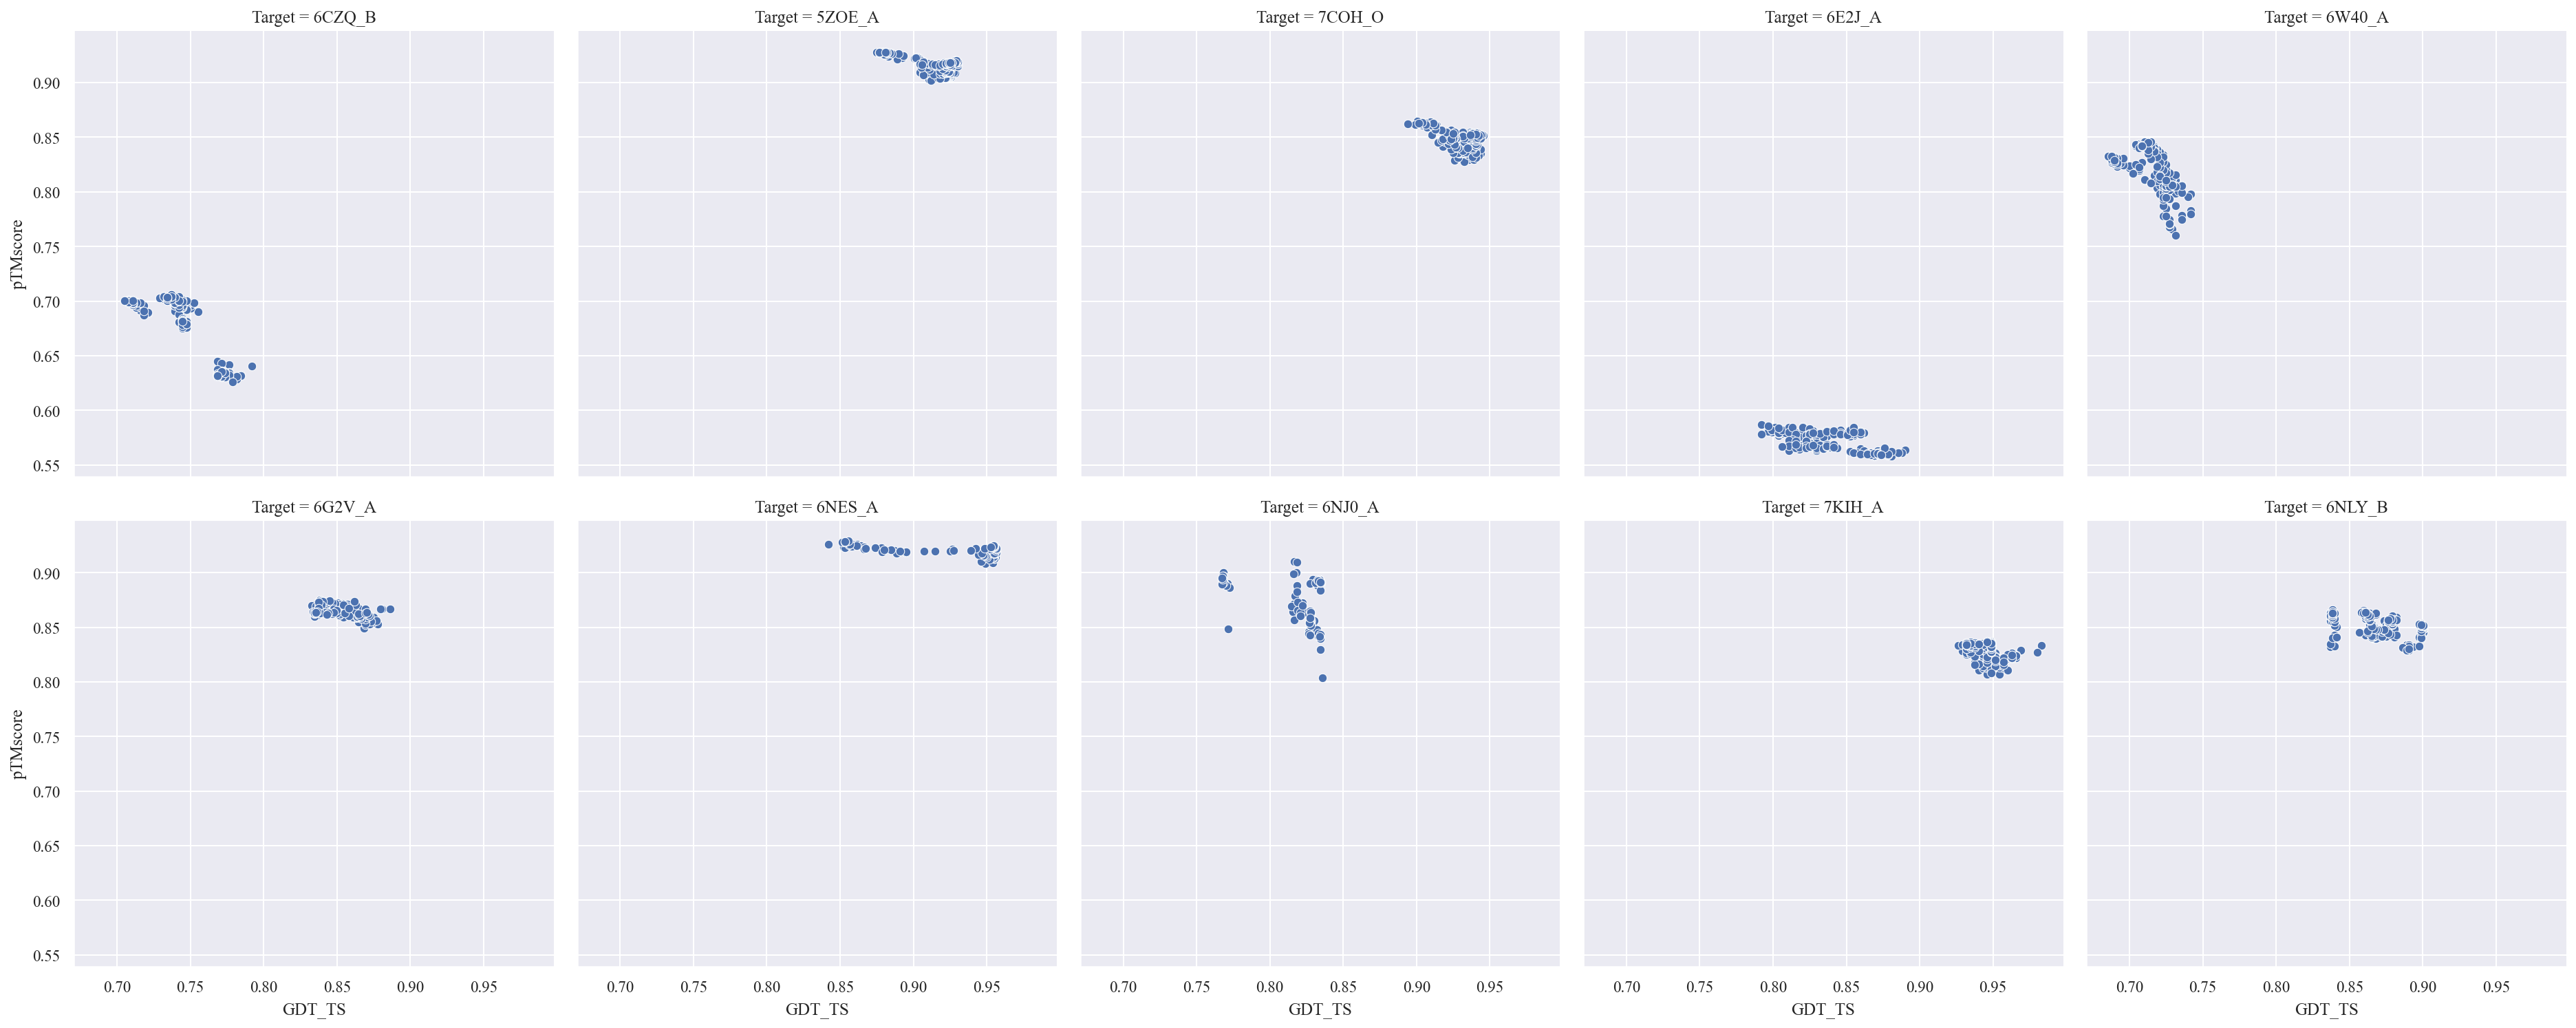

In [16]:
data = df.groupby('Target').filter(lambda x: x.name in sample_targets)
method = 'pTMscore'
label = 'GDT_TS'
x, y = label, method
sns.relplot(data=data, x=x, y=y, kind='scatter', col='Target', col_wrap=5, col_order=sample_targets)

## Targets with low GDT_TS

In [17]:
label = 'GDT_TS'
target_num = 20
gdtts_max_df = df.groupby('Target').apply(lambda x: x.loc[x[label].idxmax()]).sort_values(label)
display(gdtts_max_df.head(target_num))
sample_targets = gdtts_max_df.head(target_num).index.to_list()

Model  TMscore  GDT_TS  GDT_HA  Global_LDDT  \
Target                                                                          
6Z4U_A      model_2_seed_1_rec_10_ens_8    0.243   0.259   0.146        0.304   
6OAW_A   model_3_ptm_seed_0_rec_2_ens_1    0.609   0.411   0.257          NaN   
7EL1_E       model_3_seed_0_rec_2_ens_8    0.487   0.474   0.347        0.415   
6P3X_A       model_2_seed_1_rec_5_ens_1    0.532   0.514   0.466        0.813   
7A56_A   model_1_ptm_seed_0_rec_9_ens_1    0.654   0.554   0.434        0.674   
6EJQ_A       model_2_seed_0_rec_5_ens_8    0.559   0.587   0.464        0.844   
6D57_A       model_3_seed_1_rec_6_ens_1    0.658   0.621   0.488          NaN   
6H3S_B   model_4_ptm_seed_0_rec_6_ens_1    0.823   0.652   0.465        0.792   
6G44_A  model_4_ptm_seed_1_rec_10_ens_1    0.844   0.668   0.480        0.710   
6VG1_A   model_2_ptm_seed_0_rec_5_ens_1    0.861   0.672   0.464        0.872   
6G45_A  model_4_ptm_seed_1_rec_10_ens_1    0.852   0.704   0.522        0.709   
6RO0_B   model_5_ptm_seed_0_rec_5_ens_1    0.823   0.712   0.506        0.773   
7N50_A   model_1_ptm_seed_1_rec_6_ens_8    0.828   0.712   0.503          NaN   
6W40_A   model_3_ptm_seed_0_rec_2_ens_8    0.748   0.742   0.575        0.648   
6E7I_A       model_4_seed_0_rec_7_ens_1    0.780   0.747   0.717        0.924   
6XAY_A       model_3_seed_0_rec_1_ens_1    0.879   0.754   0.571        0.876   
6JFK_A       model_2_seed_0_rec_9_ens_1    0.860   0.771   0.627        0.778   
6LB7_A       model_1_seed_1_rec_2_ens_1    0.915   0.776   0.582        0.814   
7A9X_A       model_1_seed_1_rec_6_ens_1    0.940   0.784   0.581          NaN   
5Z49_B       model_2_seed_0_rec_3_ens_1    0.896   0.785   0.608        0.815   

        Mean_LDDT  pLDDT  pTMscore  Tolerance    ModelName  ...       SOAP  \
Target                                                      ...              
6Z4U_A      0.324  0.334       NaN      2.304      model_2  ...   9671.399   
6OAW_A        NaN  0.571     0.467     10.342  model_3_ptm  ... 157737.891   
7EL1_E      0.415  0.455       NaN      4.775      model_3  ...  30018.494   
6P3X_A      0.807  0.889       NaN      1.888      model_2  ... 263550.156   
7A56_A      0.675  0.870     0.719      0.183  model_1_ptm  ... 369047.969   
6EJQ_A      0.840  0.755       NaN      3.167      model_2  ...  28609.074   
6D57_A        NaN  0.839       NaN      5.259      model_3  ...  63250.359   
6H3S_B      0.788  0.858     0.707      0.352  model_4_ptm  ... 220179.297   
6G44_A      0.687  0.678     0.713      1.186  model_4_ptm  ... 373743.250   
6VG1_A      0.864  0.885     0.522      0.126  model_2_ptm  ... 588412.188   
6G45_A      0.692  0.617     0.621      3.558  model_4_ptm  ... 394838.688   
6RO0_B      0.766  0.741     0.639      1.480  model_5_ptm  ... 144835.844   
7N50_A        NaN  0.746     0.755      0.293  model_1_ptm  ... 181624.281   
6W40_A      0.652  0.884     0.783      0.242  model_3_ptm  ... 105422.445   
6E7I_A      0.915  0.903       NaN      0.263      model_4  ... 366542.062   
6XAY_A      0.868  0.932       NaN     46.917      model_3  ... 288207.438   
6JFK_A      0.753  0.881       NaN      0.114      model_2  ... 210728.250   
6LB7_A      0.797  0.794       NaN      1.590      model_1  ... 166369.828   
7A9X_A        NaN  0.816       NaN      0.329      model_1  ... 258037.531   
5Z49_B      0.807  0.869       NaN      0.359      model_2  ... 155151.047   

        DeepAccNet  DeepAccNet-Bert P3CMQA  ProQ2D  ProQRosCenD  ProQRosFAD  \
Target                                                                        
6Z4U_A       0.386            0.337  0.048   0.066        0.154       0.135   
6OAW_A       0.606            0.583  0.440   0.239        0.300       0.437   
7EL1_E       0.537            0.527  0.180   0.211        0.304       0.302   
6P3X_A       0.960            0.995  0.885   0.572        0.513       0.874   
7A56_A       0.978            1.000  0.565   0.564        0.

In [18]:
df.columns

Index(['Model', 'TMscore', 'GDT_TS', 'GDT_HA', 'Global_LDDT', 'Mean_LDDT',
       'pLDDT', 'pTMscore', 'Tolerance', 'ModelName', 'Seed', 'Recycle',
       'Ensemble', 'Target', 'Num_diff', 'Num_missing', 'Length', 'id',
       'resolution', 'releasedate', 'header', 'sequence', 'length',
       'num_entry_in_cluster', 'num_entry_in_cluster_AF2_notInclude',
       'is_similar_AF2', 'DOPE', 'SOAP', 'DeepAccNet', 'DeepAccNet-Bert',
       'P3CMQA', 'ProQ2D', 'ProQRosCenD', 'ProQRosFAD', 'ProQ3D', 'SBROD',
       'VoroCNN'],
      dtype='object')

In [19]:
gdtts_max_df.columns

Index(['Model', 'TMscore', 'GDT_TS', 'GDT_HA', 'Global_LDDT', 'Mean_LDDT',
       'pLDDT', 'pTMscore', 'Tolerance', 'ModelName', 'Seed', 'Recycle',
       'Ensemble', 'Target', 'Num_diff', 'Num_missing', 'Length', 'id',
       'resolution', 'releasedate', 'header', 'sequence', 'length',
       'num_entry_in_cluster', 'num_entry_in_cluster_AF2_notInclude',
       'is_similar_AF2', 'DOPE', 'SOAP', 'DeepAccNet', 'DeepAccNet-Bert',
       'P3CMQA', 'ProQ2D', 'ProQRosCenD', 'ProQRosFAD', 'ProQ3D', 'SBROD',
       'VoroCNN'],
      dtype='object')

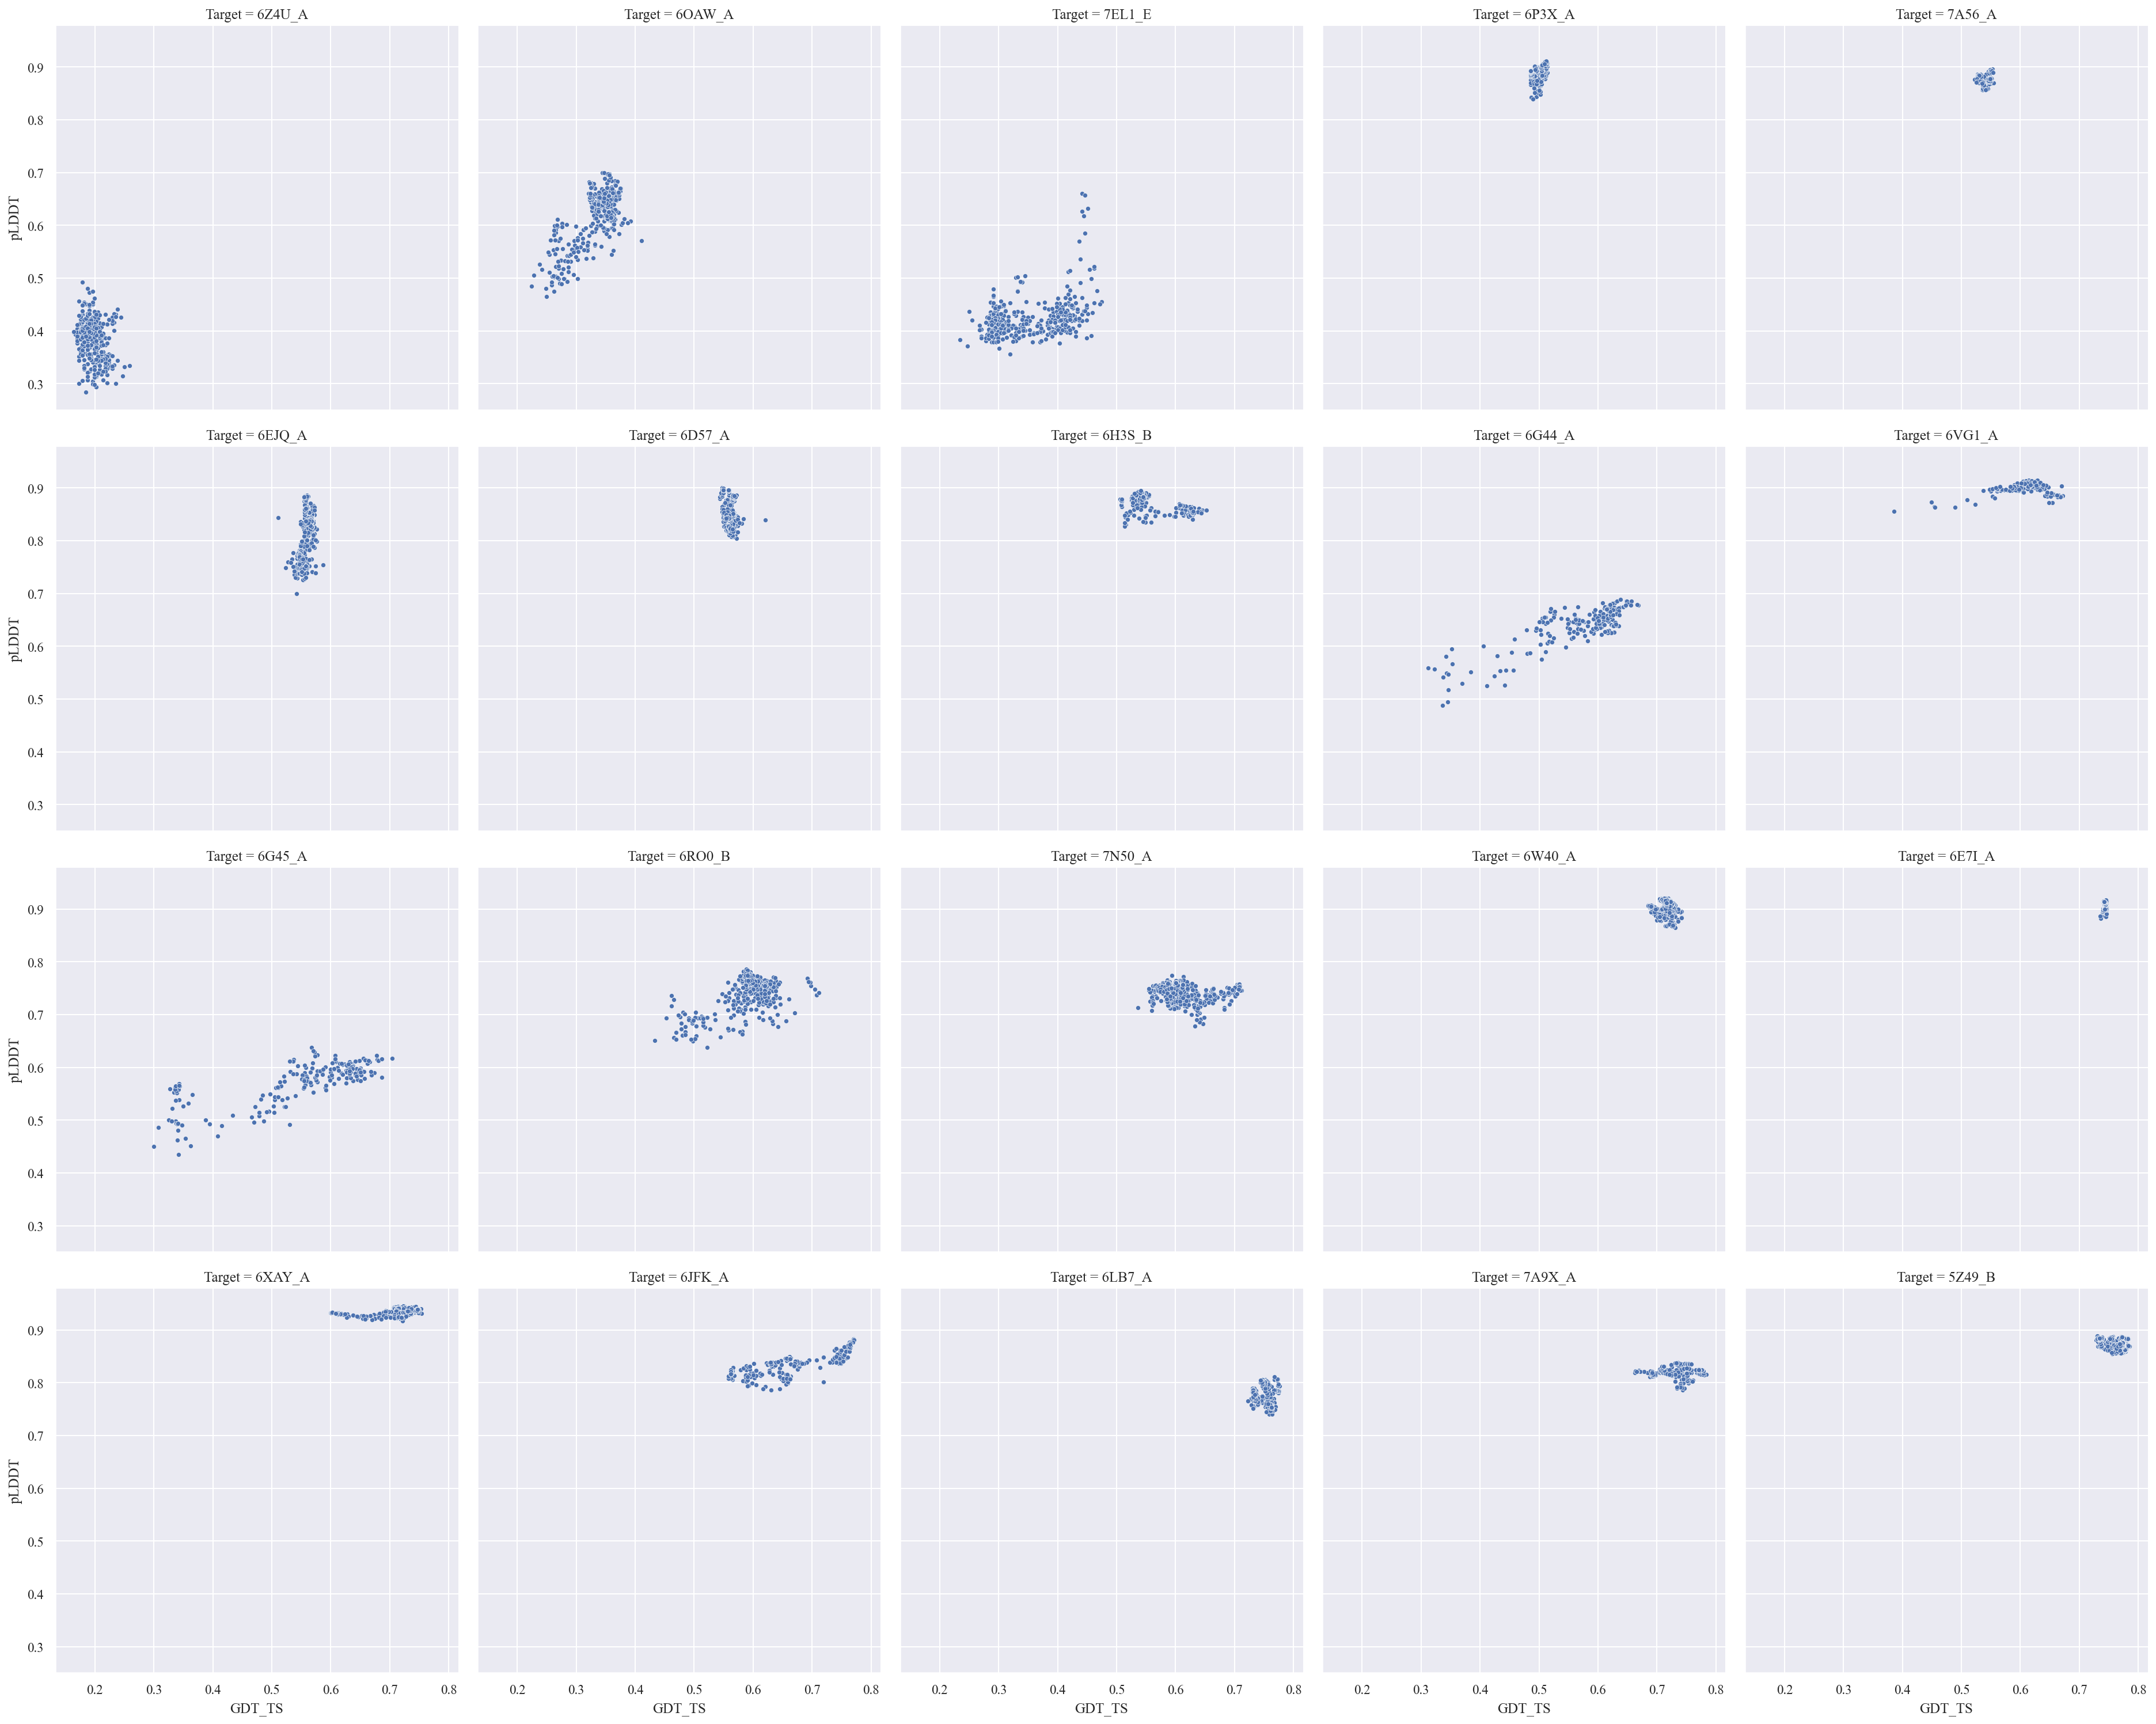

In [20]:
data = df.groupby('Target').filter(lambda x: x.name in sample_targets)
method = 'pLDDT'
label = 'GDT_TS'
x, y = label, method
sns.relplot(data=data, x=x, y=y, kind='scatter', col='Target', col_wrap=5, col_order=sample_targets, s=15)

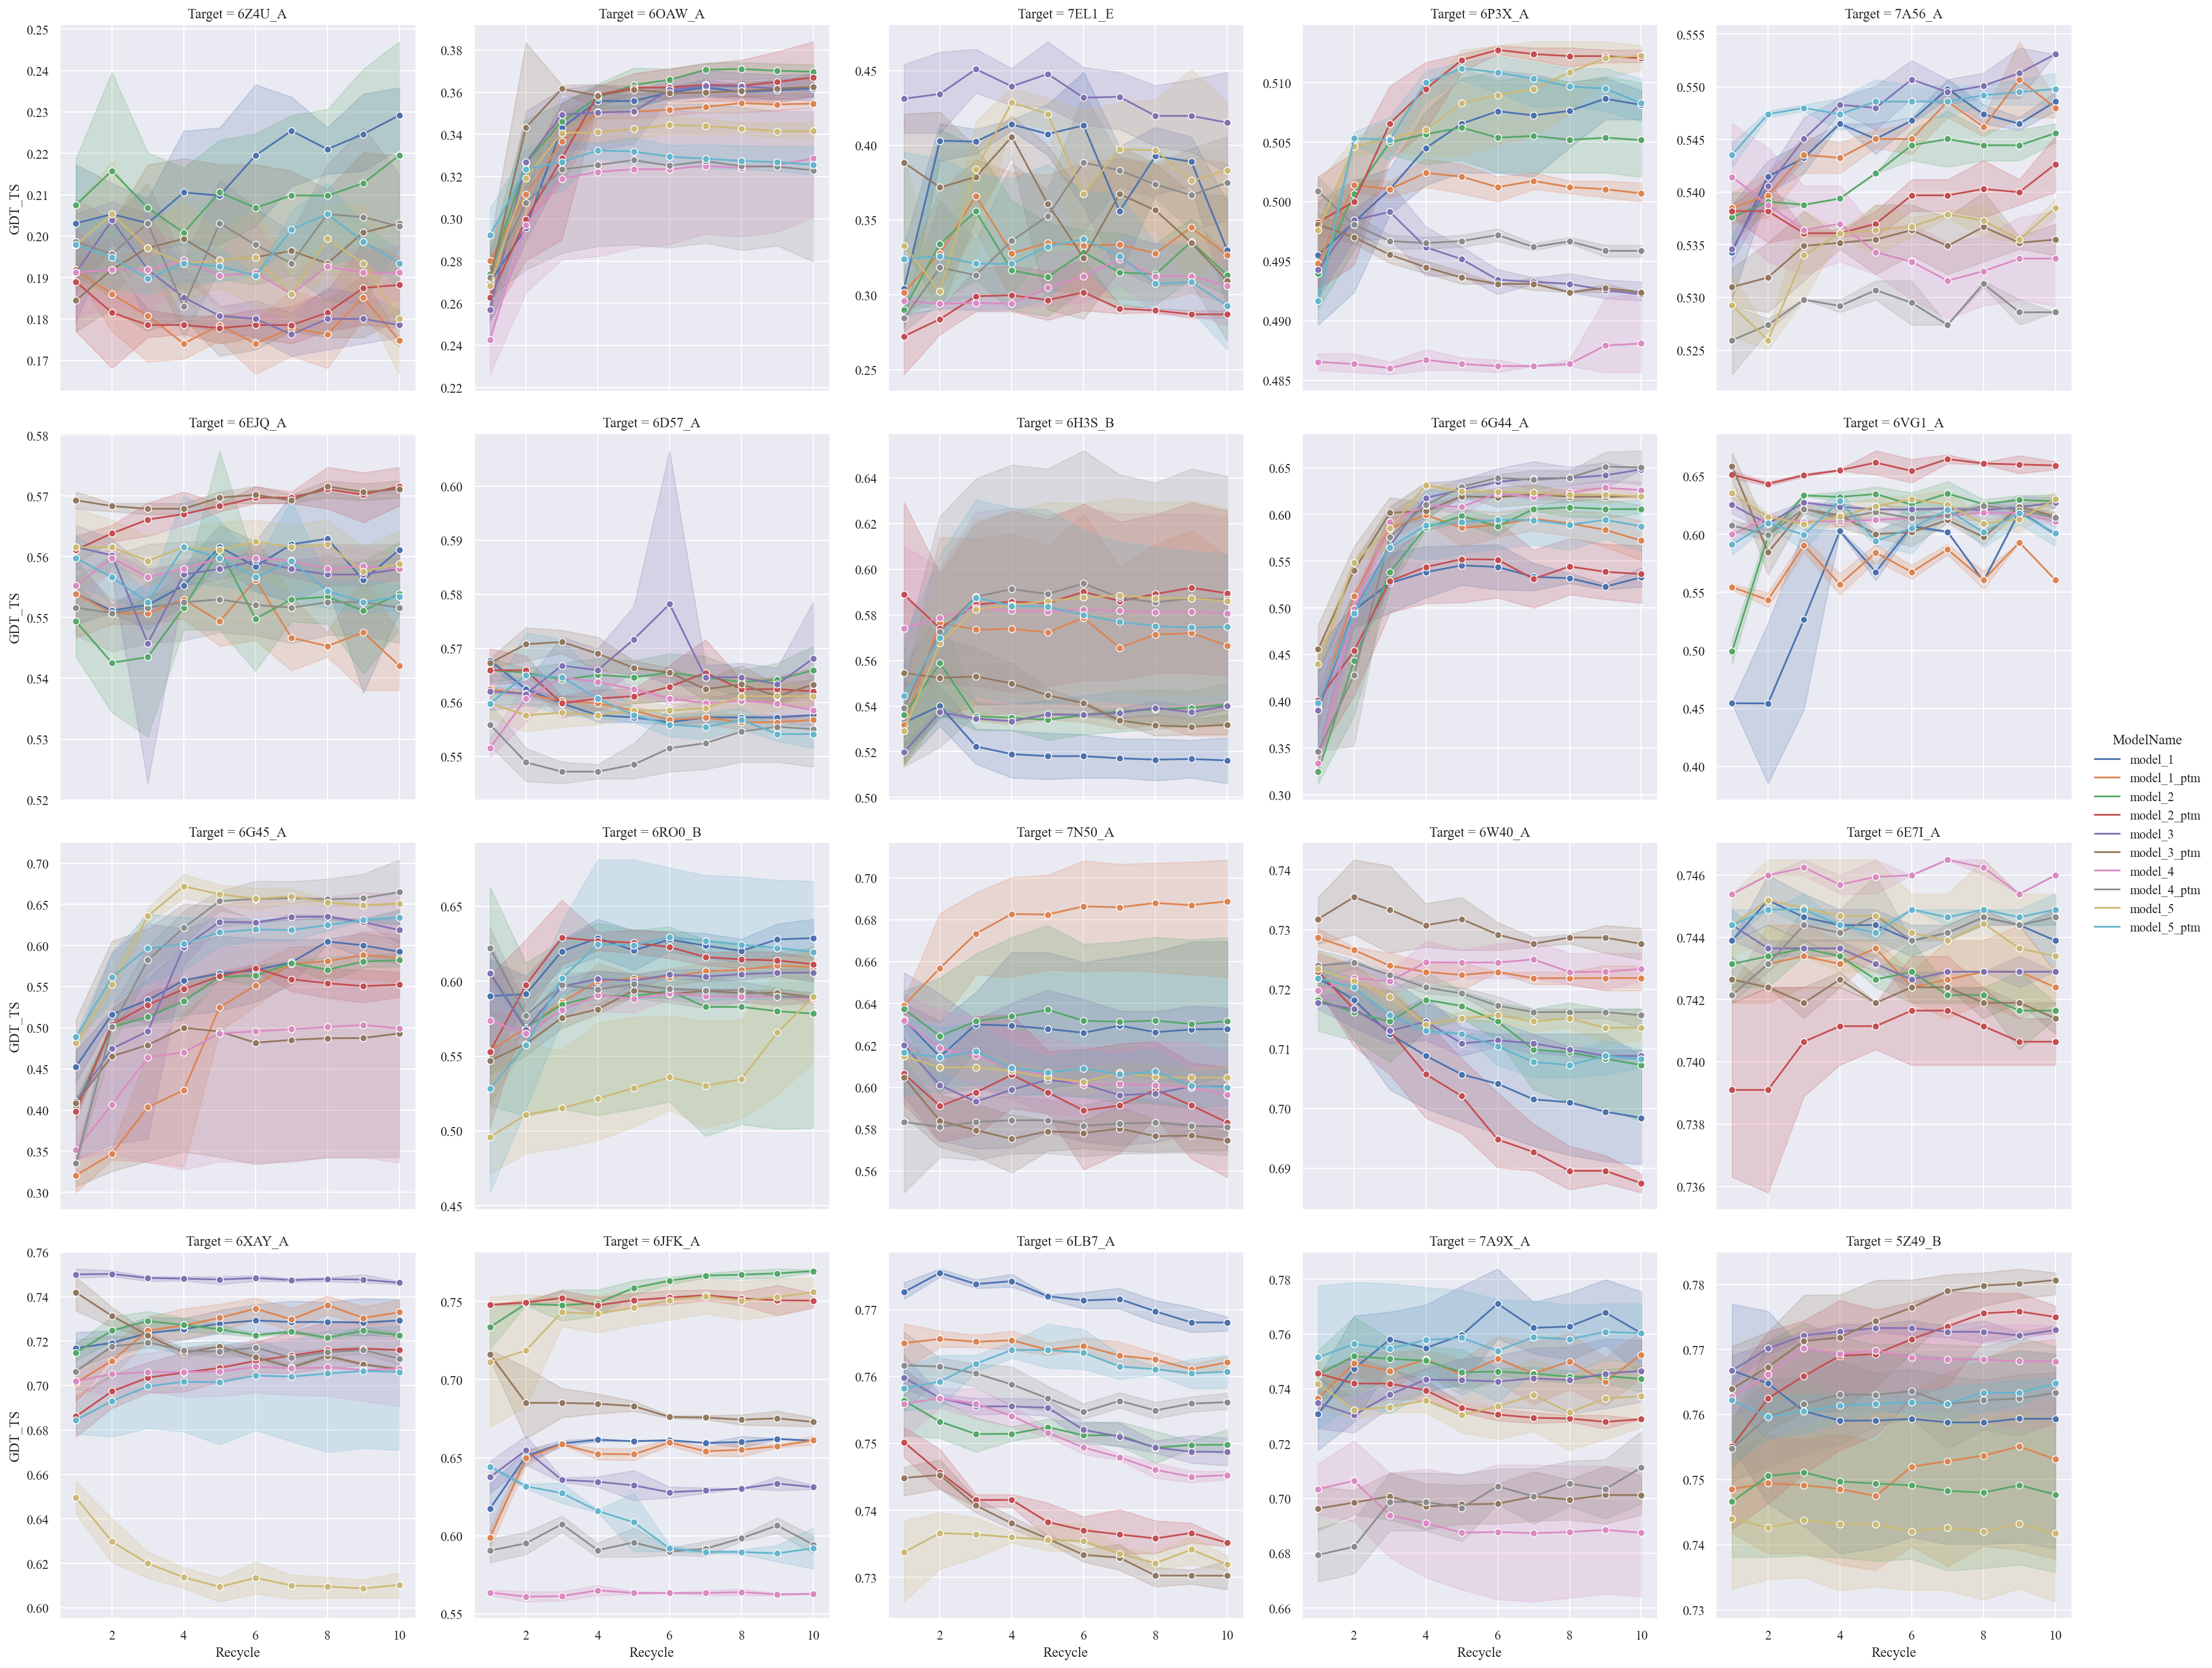

In [21]:
label = 'GDT_TS'
# For targets whose value difference between max and min is larger than threshold
data = df.query('Target in @sample_targets')
sns.relplot(data=data.sort_values(['Target', 'ModelName']), x='Recycle', y=label,
            hue='ModelName', kind='line', markers=True, dashes=True, marker='o',
            col='Target', col_wrap=5, col_order=sample_targets, facet_kws={'sharey': False, 'sharex': True})